In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import xgi
from governance import *
import matplotlib.pyplot as plt

In [11]:
def create_decision_matrix(m):
    D = np.zeros((m, m))
    for i in range(m):
        for j in range(i):
            D[j, i] = D[i, j] = random.choice([-1, 0, 1])
    return D

def create_opinions(n, m):
    D = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            D[i, j] = random.choice([-1, 0, 1])
    return D

def decisions_to_array(decisions):
    n = len(decisions)
    d = np.zeros(n)
    for key, val in decisions.items():
        if val:
            d[key] = 1
        else:
            d[key] = -1
    return d


In [12]:
num_decisions = 20
num_people = 100
opinions = create_opinions(num_people, num_decisions)
decision_matrix = create_decision_matrix(num_decisions)

In [20]:
opinions.shape

(100, 20)

In [19]:
decision_matrix.shape

(20, 20)

In [7]:
# group_size = 3
# overlap = 1

# decisions, final_opinions, decision_groups = decision_process(opinions, decision_matrix, group_size, overlap, select_decision_type="random", select_group_type="random",make_decision_type="average",update_opinions_type="average")
# d = decisions_to_array(decisions)

In [21]:
def make_decision(
    cd, decision_group, decision_matrix, opinions, how="average"
):
    # average opinions
    if how == "average":
        return np.mean(opinions[list(decision_group), cd]) > 0
    if how == "star":
        stored_decisions = []
        avg_opinions = np.mean(opinions, axis=0)
        idx = np.where(decision_matrix[cd] != 0)
        possible_decisions = [-1,1]
        for d in possible_decisions:
            ds = decision_matrix[cd] * d 
            cost_fn = np.sum(np.abs(ds[idx] - avg_opinions[idx]))
            stored_decisions.append(cost_fn)
        
        i = np.argmin(stored_decisions)
        
        return possible_decisions[i] # wow
    else:
        raise Exception("Invalid decision making type!")

In [25]:
make_decision(2, [4,7,9,1,3], decision_matrix, opinions, how="average")


False

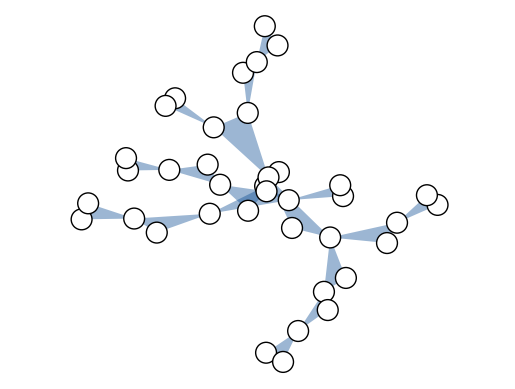

In [10]:
xgi.draw(decision_groups)

In [11]:
num_samples = 1000
group_sizes = np.arange(2, 11, 1, dtype=int)
satisfaction_group_size = np.zeros(len(group_sizes))
overlap = min(group_sizes) - 1
H_group_sizes = dict()

for i in range(len(group_sizes)):
    g = group_sizes[i]
    for j in range(num_samples):
        decisions, final_opinions, decision_groups = decision_process(opinions, decision_matrix, group_size, overlap, select_decision_type="random", select_group_type="random",make_decision_type="average",update_opinions_type="average")
        H_group_sizes[(g, overlap, j)] = decision_groups
        d = decisions_to_array(decisions)
        satisfaction_group_size[i] += np.mean(final_opinions.dot(d))/num_samples

/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 19 already exists, cannot add edge {57, 10, 92}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 11 already exists, cannot add edge {74, 44, 13}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 19 already exists, cannot add edge {91, 36, 53}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 19 already exists, cannot add edge {32, 26, 94}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.

In [12]:
num_samples = 1000
overlap_sizes = np.arange(2, 11, 1, dtype=int)
satisfaction_overlap_size = np.zeros(len(group_sizes))
group_size = max(overlap_sizes) + 1

H_overlap_sizes = dict()

for i in range(len(overlap_sizes)):
    o = overlap_sizes[i]
    for j in range(num_samples):
        decisions, final_opinions, decision_groups = decision_process(opinions, decision_matrix, group_size, overlap, select_decision_type="random", select_group_type="random",make_decision_type="average",update_opinions_type="average")
        H_overlap_sizes[(group_size, o, j)] = decision_groups
        d = decisions_to_array(decisions)
        satisfaction_overlap_size[i] += np.mean(final_opinions.dot(d))/num_samples

/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 18 already exists, cannot add edge {57}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 18 already exists, cannot add edge {76}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 18 already exists, cannot add edge {47}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 19 already exists, cannot add edge {66}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 17 alre

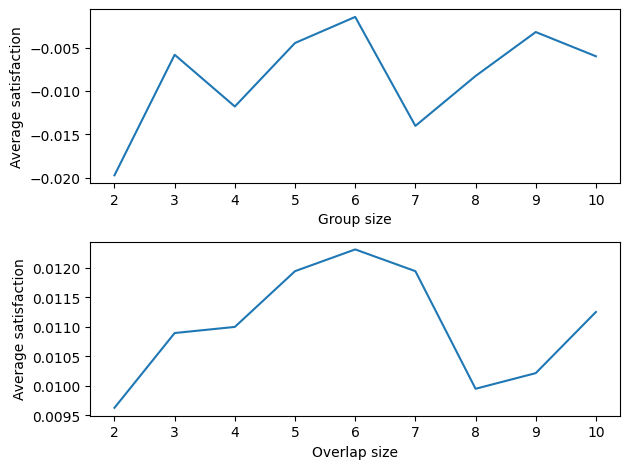

In [13]:
plt.figure()
plt.subplot(211)
plt.plot(group_sizes, satisfaction_group_size)
plt.ylabel("Average satisfaction")
plt.xlabel("Group size")
plt.subplot(212)
plt.plot(overlap_sizes, satisfaction_overlap_size)
plt.ylabel("Average satisfaction")
plt.xlabel("Overlap size")
plt.tight_layout()
plt.show()

In [14]:
num_samples = 100
group_sizes = np.arange(2, 11, 1, dtype=int)
satisfaction_group_size = np.zeros(len(group_sizes))
overlap = min(group_sizes) - 1
H_group_sizes = dict()

for i in range(len(group_sizes)):
    g = group_sizes[i]
    for j in range(num_samples):
        decisions, final_opinions, decision_groups = decision_process(opinions, decision_matrix, group_size, overlap, select_decision_type="degree", select_group_type="random",make_decision_type="average",update_opinions_type="average")
        H_group_sizes[(g, overlap, j)] = decision_groups
        d = decisions_to_array(decisions)
        satisfaction_group_size[i] += np.mean(final_opinions.dot(d))/num_samples

/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 14 already exists, cannot add edge {32, 66, 67, 68, 72, 41, 11, 80, 18, 50, 20}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 10 already exists, cannot add edge {83}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 12 already exists, cannot add edge {75}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 15 already exists, cannot add edge {5}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hype

In [15]:
num_samples = 100
overlap_sizes = np.arange(2, 11, 1, dtype=int)
satisfaction_overlap_size = np.zeros(len(group_sizes))
group_size = max(overlap_sizes) + 1

H_overlap_sizes = dict()

for i in range(len(overlap_sizes)):
    o = overlap_sizes[i]
    for j in range(num_samples):
        decisions, final_opinions, decision_groups = decision_process(opinions, decision_matrix, group_size, overlap, select_decision_type="degree", select_group_type="random",make_decision_type="average",update_opinions_type="average")
        H_overlap_sizes[(group_size, o, j)] = decision_groups
        d = decisions_to_array(decisions)
        satisfaction_overlap_size[i] += np.mean(final_opinions.dot(d))/num_samples

/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 5 already exists, cannot add edge {75}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 14 already exists, cannot add edge {9}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 6 already exists, cannot add edge {11}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 16 already exists, cannot add edge {68}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 17 already

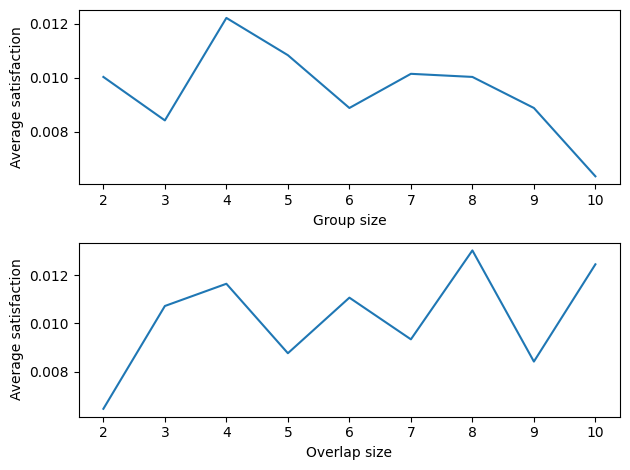

In [16]:
plt.figure()
plt.subplot(211)
plt.plot(group_sizes, satisfaction_group_size)
plt.ylabel("Average satisfaction")
plt.xlabel("Group size")
plt.subplot(212)
plt.plot(overlap_sizes, satisfaction_overlap_size)
plt.ylabel("Average satisfaction")
plt.xlabel("Overlap size")
plt.tight_layout()
plt.show()

In [17]:
num_samples = 1000
group_sizes = np.arange(2, 11, 1, dtype=int)
satisfaction_group_size = np.zeros(len(group_sizes))
overlap = min(group_sizes) - 1
H_group_sizes = dict()

for i in range(len(group_sizes)):
    g = group_sizes[i]
    for j in range(num_samples):
        decisions, final_opinions, decision_groups = decision_process(opinions, decision_matrix, group_size, overlap, select_decision_type="sentiment", select_group_type="random",make_decision_type="average",update_opinions_type="average")
        H_group_sizes[(g, overlap, j)] = decision_groups
        d = decisions_to_array(decisions)
        satisfaction_group_size[i] += np.mean(final_opinions.dot(d))/num_samples

/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 19 already exists, cannot add edge {33, 98, 74, 78, 15, 49, 19, 21, 57, 25, 95}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 18 already exists, cannot add edge {98, 90, 6, 37, 74, 12, 46, 15, 83, 88, 26}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 16 already exists, cannot add edge {67, 38, 10, 75, 45, 15, 52, 85, 24, 57, 92}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 8 already exists, cannot add edge {32}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/

In [18]:
num_samples = 1000
overlap_sizes = np.arange(2, 11, 1, dtype=int)
satisfaction_overlap_size = np.zeros(len(group_sizes))
group_size = max(overlap_sizes) + 1

H_overlap_sizes = dict()

for i in range(len(overlap_sizes)):
    o = overlap_sizes[i]
    for j in range(num_samples):
        decisions, final_opinions, decision_groups = decision_process(opinions, decision_matrix, group_size, overlap, select_decision_type="sentiment", select_group_type="random",make_decision_type="average",update_opinions_type="average")
        H_overlap_sizes[(group_size, o, j)] = decision_groups
        d = decisions_to_array(decisions)
        satisfaction_overlap_size[i] += np.mean(final_opinions.dot(d))/num_samples

/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 19 already exists, cannot add edge {64, 65, 67, 41, 75, 79, 17, 18, 59, 30, 31}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 18 already exists, cannot add edge {65, 34, 40, 10, 43, 77, 79, 47, 80, 17, 91}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 19 already exists, cannot add edge {64, 98, 2, 66, 69, 41, 51, 84, 53, 88, 61}
  warn(f"uid {id} already exists, cannot add edge {members}")
/home/jstonge/miniconda3/envs/governance/lib/python3.8/site-packages/xgi/classes/hypergraph.py:534: UserWarning: uid 15 already exists, cannot add edge {32, 97, 65, 58, 46, 17, 52, 25, 26, 94, 63}
  warn(f"uid {id} already e

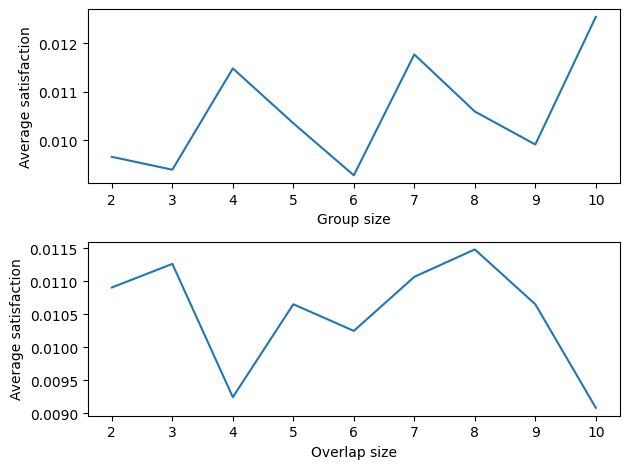

In [19]:
plt.figure()
plt.subplot(211)
plt.plot(group_sizes, satisfaction_group_size)
plt.ylabel("Average satisfaction")
plt.xlabel("Group size")
plt.subplot(212)
plt.plot(overlap_sizes, satisfaction_overlap_size)
plt.ylabel("Average satisfaction")
plt.xlabel("Overlap size")
plt.tight_layout()
plt.show()

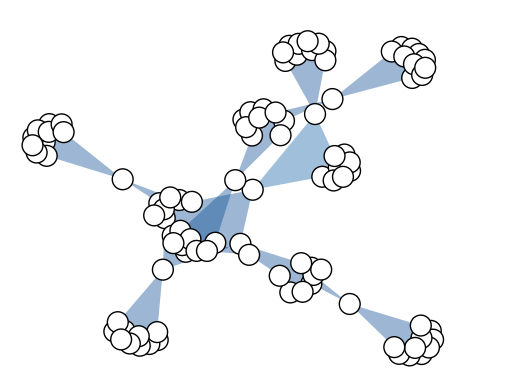

: 

In [20]:
xgi.draw(H_overlap_sizes[(11, 2, 5)])